18 November 2024 <br>
Mufarowashe Chiyangwa <br>
ST10261507 <br>
PDAN8412w
<br>
<br>
<br>
<br>
# POE Task 3 - Image classification
<br>

## 1. What is image classification?

Image classification refers to the process of assigning a label to an image based on pre-existing training data of already labeled images. This process involves analyzing the image at pixel-level to determine the most appropriate label for the overall image (SuperAnnotate, 2023).

Types of image classification:
- Binary: classifies images into two classes (SuperAnnotate, 2023).
- Multiclass: classifies images into three or more classes (SuperAnnotate, 2023).
- Multilabel: allows images to be classified into more than one class (SuperAnnotate, 2023).
- Hierarchical: classifies images into hierarchical structures based on their similarities, where higher levels indicate broader categorizations and lower levels indicate more specific categorizations. For example, an image is first distinguished as a cat on a higher level of the hierarchical classification structure, then finally distinguished as a black-spotted jaguar on the lowest level of the hierarchical classification structure (SuperAnnotate, 2023).

How image classification works:
The first stage of image classification is image preprocessing, where methods such as image resizing, cropping, normalization and reduction are implemented to improve data quality and prepare the images for the stages that follow (SuperAnnotate, 2023). The next stage is feature extraction, where visual patterns within an image are identified that will be used to distinguish one class of image from another (SuperAnnotate, 2023). Once feature extraction has taken place (which happens during the model training stage), the learned patterns can be used to classify new images (SuperAnnotate, 2023).

Applications of image classification:
- Medical images: dermatologists use image classification to diagnose skin conditions like melanoma (skin cancer) (SuperAnnotate, 2023).
- Autonomous driving: automotive companies use image classification to help self-driving cars differentiate between surrounding objects like pedestrians, traffic lights, road signs, and other cars (SuperAnnotate, 2023).
- Agriculture: farmers use image classification to identify crop pests and diseases, and monitor plant growth (SuperAnnotate, 2023).
<br>

## 2. What data set was chosen an why is it appropriate for image classification?

The chosen data set is a Melanoma (skin cancer) data set consisting of high-quality images of benign (non-cancerous) and malignant (cancerous) growths/skin tags/tumours. The data set was found on Kaggle and can be accessed using the following link (along with all its relevant metadata): https://www.kaggle.com/datasets/hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images 

The data set consists of 2 folders: 
- The 'train' folder consists of 9600 images of both classes (benign and malignant).
- The 'test' folder consists of 1000 images of both classes.
For the sake of this analysis, we are only going to use the images in the 'train' folder, which gives us a sufficient amount of images for model training, validation and testing.
<br>

The chosen data set is appropriate for image classification because it adheres to the following criteria:
- Categorical target with at least 2 classes: the images must be labeled according to their respective classes in order for them to be used for model training (Levity, 2024).
- Image focus: the images in the data set should have a strong central focus on what you want the classifier to distinguish between (Levity, 2024).
- Balanced data: imbalanced data can skew the results of the performance metrics for classification, affecting their validity. A balanced data set ensures that the classifiation model is not "biased towards one class" (Medium, 2023), thus preserving the validity of the results obtained from the classification metrics. For image classification, the number of images per class should be similar if not the same (Levity, 2024). 
- Sufficient amount of data: the more image data you have, the more information the image classifier will have to effectively distinguish between classes, especially when the number of classes increases. The more classes you have, the more images you want to collect per class (Levity, 2024).
<br>

## 3. Explanation of the analysis that will be conducted on the data set

We seek to conduct an image classification analysis where we build a Convolutional Neural Network (CNN) that can diagnose malignant growths/skin tags/tumours with a high degree of predictive potency.

Objectives of the analysis:
- Conduct thorough image processing before using the data for model training purposes.
- Build a functioning CNN model from The Tensorflow library, apply model improvement techniques, and successfully embed it into a fully functioning pipeline along with another preprocessing task.
- Fit the pipeline onto the data.
- Calculate, interpret and understand our model evaluation metrics regarding the logistic CNN model's classification capabilities (especially its ability to diagnose malignant instances).
<br>

## 4. The data analysis process

The various python libraries that are going to be required for the analysis are as follows:

In [1]:
# Import necessary packages

# general
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score


2024-11-18 18:36:53.600693: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-18 18:36:54.226919: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-18 18:36:58.270201: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-18 18:36:58.283518: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-18 18:37:03.196082: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

### 4.1. Data importation and preprocessing

To start off, we pull our data in from Kaggle using the following API command:

In [2]:
# pull in dataset using kaggle dataset API
!kaggle datasets download -d hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images

Dataset URL: https://www.kaggle.com/datasets/hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images
License(s): CC0-1.0
melanoma-skin-cancer-dataset-of-10000-images.zip: Skipping, found more recently modified local copy (use --force to force download)


Next, we unzip the dataset.

In [3]:
# unzip dataset
!unzip melanoma-skin-cancer-dataset-of-10000-images

Archive:  melanoma-skin-cancer-dataset-of-10000-images.zip
replace melanoma_cancer_dataset/test/benign/melanoma_10000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


Now, we set a path through which our desired files can be read.

In [4]:
# set path directory with which dataset will be read
# we're only reading in the 'train' folder with the training set images in it
path = '/home/lab_services_student/melanoma_cancer_dataset/train'

Next, we load our images from the specified directory using Tensorflow's ImageDataGenerator() class, which also has some preprocessing features. The documentation for the ImageDataGenerator() class can be found on the following link: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator 

In [5]:
# Instantiating ImageDataGenerator class
data_loader = ImageDataGenerator()

# Load images
# flow_from_directory() method allows us to retrieve images from a specfied directory
image_data = data_loader.flow_from_directory(
    path, target_size=(256, 256),              # target size resizes images to specififed resolution
    batch_size=16, class_mode='binary',        # class mode specifies number of classes
    shuffle=True,                              # shuffle=True shuffles images out of order (for the...
    seed=25                                    # purpose of visulaization)
)                                              # random seed set for reproducible results



Found 9605 images belonging to 2 classes.


Next, we investigate one batch of our loaded images (16 images) and plot them using Matplotlib's Pyplot to see the result of the ImageDataGenerator() class.

In [6]:
# Getting a batch of images and labels from the image_data object
images, labels = image_data.next()

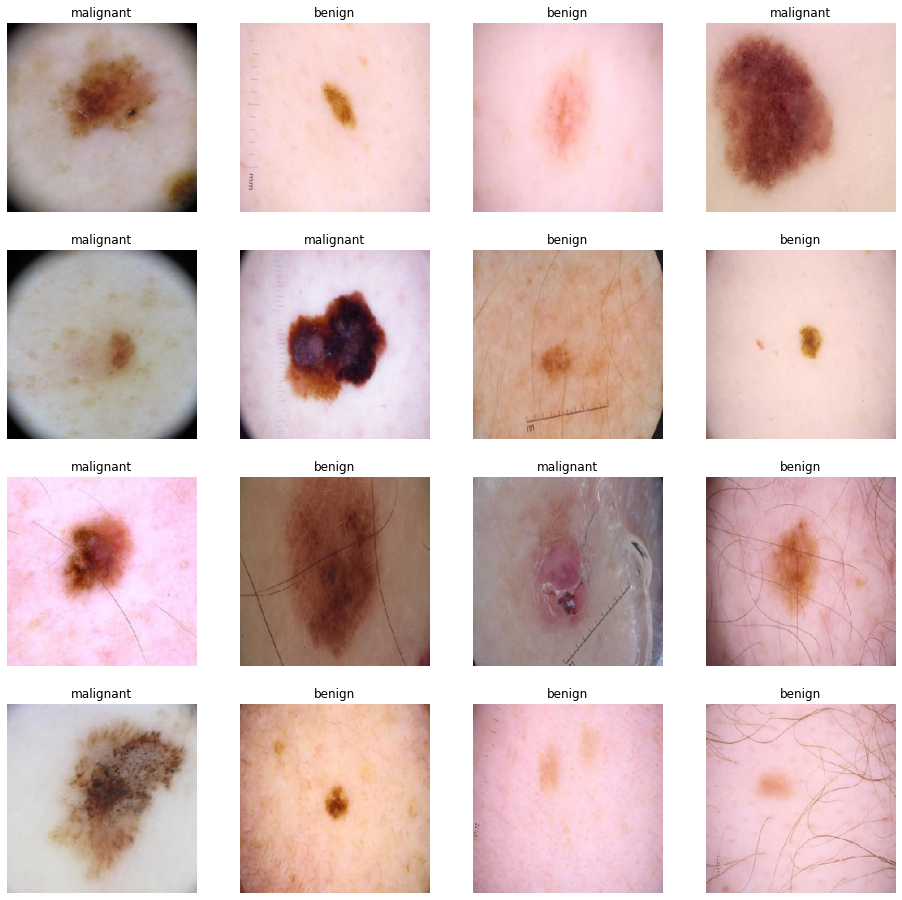

In [7]:
# Accessing class labels to plot as image titles
class_labels = list(image_data.class_indices.keys())

# Plotting a figure with a grid of 4x4 images (16 images total)
plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].astype("uint8")) # pixel values converted to uint8 for display
    label = int(labels[i])
    plt.title(class_labels[label])
    plt.axis("off") # hides axis

plt.show()

It's interesting to observe the very apparent differences between the benign and malignant growths/skin tags in these 16 instances. The benign growths/skin tags seem to be more symmetrical in nature, more regular in shape, and somewhat monochromatic. The malignant, cancerous growths/skin tags seem to be more asymmetrical in nature, more irregular in shape, and more polychromatic in relation to the benign instances.

The image resolution was set to 256 x 256 when the images were loaded for the sake of the clarity of the above images. We actually want to reload the images at a resolution of 32 x 32 to cut down on computational expenses for the sake of this analysis. 

In [8]:
# Reload images with target_size = (32, 32)
image_data = data_loader.flow_from_directory(
    path, target_size=(32, 32),              
    batch_size=16, class_mode='binary',        
    shuffle=True,                              
    seed=25                                    
)                                              


Found 9605 images belonging to 2 classes.


Next, we separate our entire dataset into X and y.

In [9]:
# Initializing lists to store X and y
X = []
y = []

# Iterating through the data generator and appending all the batches of images
for images, labels in image_data:
    X.append(images)
    y.append(labels)

    # Break loop when all batches have been appended
    if len(X) * image_data.batch_size >= image_data.samples:
        break

# Convert lists of batches to single numpy arrays
X = np.concatenate(X, axis=0)
y = np.concatenate(y, axis=0)

print("The shape of X is {}".format(X.shape))
print("The shape of y is {}".format(y.shape))


The shape of X is (9605, 32, 32, 3)
The shape of y is (9605,)


Next, let's investigate the data type of our y variable to ensure it is integer.

In [10]:
print("Target data type - before: {}".format(y.dtype))
y = y.astype(int)
print("Target data type - after: {}".format(y.dtype))

Target data type - before: float32
Target data type - after: int64


Let's also check the balance of our dataset.

In [11]:
# checking the balance of the dataset
np.unique(y, return_counts=True)

(array([0, 1]), array([5000, 4605]))

The dataset is well-balanced, with a 52/48 balance ratio (with 52% of the instances being benign and 48% of the instances being malignant). There's no need to fuss about achieving a perfect balance in this case - the model won't suffer from any detrimental bias towards any class; the consequence of this slight imbalance will be minuscule at most. And in fact, when you have a balance ratio that's as close to perfect as this one, oversampling and undersampling techniques may actually worsen data quality. Undersampling techniques will take away crucial information and an oversampling technique like SMOTE which creates artificial instances for the minority class may add unnecessary noise. We want the image data we are working with to stay as true to itself as possible so it can tell as unblemished a story as possible.

Lastly, we create our training and testing partitons, and check their shapes. 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
print("The shape of X_train is {}".format(X_train.shape))
print("The shape of X_test is {}".format(X_test.shape))
print("The shape of y_train is {}".format(y_train.shape))
print("The shape of y_test is {}".format(y_test.shape))

The shape of X_train is (7684, 32, 32, 3)
The shape of X_test is (1921, 32, 32, 3)
The shape of y_train is (7684,)
The shape of y_test is (1921,)


Our image data is now ready for the next stage of analysis.

### 4.2. Scaling and CNN pipeline

Instead of scaling our data separately then building and training the CNN model, we are going to build a pipeline that will integrate these steps using the Pipeline() class form Scikit-Learn's pipeline module. First, we build a scaling class that will scale our data by dividing it by a constant of 255 so that the values fall between the range of 0 and 1.  The TransformerMixin class from Scikit-Learn's base module will be integrated into the scaling class; the TransformerMixin class allows the scaling class to inherit the fit_transform() method that typical Scikit-Learn transformers have. A fit() and transform() method will still have to be defined in the scaling class, but the fit_transform() method that comes with TransformerMixin is compatible with, and convenient for the Scikit-Learn Pipeline() class' operations (Scikit Learn, 2024).

In [13]:
# Defining a custom scaler that will divide the data by 255 and that is compatible with...
# Scikit-Learn's Pipeline() class.

class ImageScaler(TransformerMixin): 
    # defining the fit method
    # Pipeline() class expects transformers to accept both X and y parameters for the fit method, even though...
    # only X is being scaled, so y is set to None by default for the sake of compatibility
    def fit(self, X, y=None):
        return self
    
    # defining the transform method
    def transform(self, X):
        return X / 255.0

Next, we build a custom CNN class specific to the task at hand that is compatible with Scikit-Learn's Pipeline() class by integrating it with the BaseEstimator class, which allows the CNN class to inherit all the default functionality, parameters and attributes that a Scikit-Learn estimator would have, and most importantly, will also make it compatible with the Pipeline() class (Scikit Learn, 2024). In other words, the BaseEstimator class will allow us to package the Tensorflow CNN in Scikit-Learn wrapping so that the Pipeline() class thinks it's a Scikit-Learn estimator.

The architecture of the Tensorflow CNN model built into the custom class was inspired by the following tutorial: https://www.tensorflow.org/tutorials/images/cnn 

Before we build our custom CNN class, we set random seeds for all the randomized processes in building neural networks so that we get (or atleast come very close to getting) reproducible results.

In [14]:
# set random seed for reproducible results
random.seed(25) # imported from 'random' module
np.random.seed(25)
tf.random.set_seed(25)

Now we build our custom CNN class.

The following are reasons behind some of the CNN model architecture, regularization, and hyperparameter tuning choices:
- A sigmoid activation function was chosen for the output dense layer because from experience, it has been observed that the softmax activation function (along with the categorical/sparse categorical cross entropy loss function) don't work very well for binary classification, although compatible with it.
- Max pooling was chosen to capture more definite shapes and patterns during the convolution phase, since some of the parameters that differentiate benign and malignant growths are size, shape and symmetry.
- A kernel size of (3, 3) was chosen for the sake of convention (Medium, 2023).
- A stride of (1, 1) was set in all the convolutional layers to gather as much information as possible from the images (especially because the images are of a low resolution) (Medium, 2023).
- The padding of all the convolutional layers was set to 'same' to retain the spatial resolution of the images as much as possible throughout the layers (Medium, 2023).
- Two dropout layers set at a dropout rate of 20% were placed after the first two convolutional layers to help regularize the model.

In [15]:
# BUILDING THE CUSTOM CNN CLASS COMPATIBLE WITH PIPELINE()

class PipelineCNN(BaseEstimator):

    # creating initialization method using __init__ that will initialize defined attributes when class...
    # instance is called.
    # This is a task-specific class - the parameters that were initialized were the ones where...
    # flexibility was an option for them.
    def __init__(self, learning_rate=0.001, epochs=20, dropout_rate=0.2, validation_split=0.2):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.dropout_rate = dropout_rate
        self.validation_split = validation_split
        self.model = None # Placeholder for model since there are parameters in the model-building class...
                          # with flexibility and model will not be built during initialization

    # creating a function that will build the task-specific CNN model
    def CNN_model(self):

        # CNN MODEL ARCHITECTURE

        # Convolutional Base
        model = Sequential([
            Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', 
                   input_shape=(32, 32, 3)), # 3 in input_shape for 'RGB'
            Dropout(self.dropout_rate),
            MaxPooling2D((2, 2)),
            Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'),
            Dropout(self.dropout_rate),
            MaxPooling2D((2, 2)),
            Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'),

            # Flatten + Dense layers
            Flatten(),
            Dense(64, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
        return model
    
    # creating a fit method that the Pipeline() class can recognize as a Scikit-Learn fit method...
    # that wraps around the Tensorflow CNN model's compile and fit methods.
    def fit(self, X, y):
        # Instantiating in-built Tensorflow CNN model architecture and assigning it to self.model placeholder
        self.model = self.CNN_model()
        # Instantiating Adam optimizer
        adam=Adam(learning_rate=self.learning_rate)
        # Compiling the model
        self.model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
        # Instantiating early stopping
        early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=False)
        # Using Tensorflow CNN model's fit method
        history = self.model.fit(X, y, epochs=self.epochs, batch_size=16, validation_split=self.validation_split, callbacks=[early_stopping])
        # print model architecture summary (cannot make it a method of its own because the Pipeline()...
        # class does not have a summary method)
        self.model.summary()
        # return history object
        return history
    
    # creating a predict_proba method that the Pipeline() class can recognize that will return the...
    # predicted probabilities (default Tensorflow NN output) of the CNN model
    def predict_proba(self, X):
        return self.model.predict(X)
    
    # creating a predict method that the Pipeline() class can recognize that will return the...
    # predicted probabilities of the CNN model converted into Class 1 binary predictions
    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype(int).tolist()

    # creating a score method that the Pipeline() class can recognize that will return the...
    # accuracy output of the CNN model's evaluate method
    def score(self, X, y):
        loss, accuracy = self.model.evaluate(X, y)
        return accuracy

Now that our custom CNN class has been built, we can build our pipeline.

In [16]:
# creating the pipeline with the custom scaler and custom CNN class
pipeline = Pipeline([('scaler', ImageScaler()), ('cnn', PipelineCNN())])

Our pipeline has successfully been built and our model can now be evaluated.

### 4.3. Model Evaluation Part 1 - Accuracy, confusion matrix, and classification report

We begin our model evaluation by fitting our pipeline onto the training data and investigating the CNN model's validation results. In this case, one of the outputs of the fit() method is the training and validation results of the model because that is part of how the fit() method was defined when the custom CNN class was being built. The model architecture summary was also a nice addition to the fit() method.

In [17]:
# fitting pipeline onto training data
pipeline.fit(X_train, y_train)

Epoch 1/20
385/385 [==============================] - 6s 11ms/step - loss: 0.4895 - accuracy: 0.7420 - val_loss: 0.3904 - val_accuracy: 0.8172
Epoch 2/20
385/385 [==============================] - 4s 9ms/step - loss: 0.3326 - accuracy: 0.8572 - val_loss: 0.3633 - val_accuracy: 0.8770
Epoch 3/20
385/385 [==============================] - 4s 9ms/step - loss: 0.2861 - accuracy: 0.8796 - val_loss: 0.3293 - val_accuracy: 0.8822
Epoch 4/20
385/385 [==============================] - 4s 9ms/step - loss: 0.2662 - accuracy: 0.8868 - val_loss: 0.2791 - val_accuracy: 0.8887
Epoch 5/20
385/385 [==============================] - 4s 9ms/step - loss: 0.2498 - accuracy: 0.8936 - val_loss: 0.2573 - val_accuracy: 0.8939
Epoch 6/20
385/385 [==============================] - 4s 9ms/step - loss: 0.2389 - accuracy: 0.9021 - val_loss: 0.2885 - val_accuracy: 0.8842
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param 

Pipeline(steps=[('scaler', <__main__.ImageScaler object at 0x7f6c3f06e7c0>),
                ('cnn', PipelineCNN())])

We observe an impressive validation score of approximately 88.42% on the last epoch, with very little training time required for the model. Let's investigate the accuracy score on the test set to see how it compares using the score() method that was defined as a wrapper for the evaluate() method in the custom CNN class.

In [18]:
# evaluating test set score
pipeline.score(X_test, y_test)

34/61 [===============>..............] - ETA: 0s - loss: 0.2784 - accuracy: 0.891561/61 [==============================] - 0s 3ms/step - loss: 0.2824 - accuracy: 0.8891


0.8891202211380005

We also observe a similarly impressive test score of approximately 88.91% on the test set - the model is very well fit onto the data.

It was interesting to note that cutting down the image resolution to 32 x 32 (with proportianate adjustments being made to the number of filters in the convolutional layers) not only cut down on computational expenses (it made the model run faster), but also drastically improved model accuracy (both training/validation and testing). This could be due to the model architecture, and maybe also due to the fact that the low resolution pronounced the basic/foundational patterns within the images that actually distinguish benign and malignant growths/skin tags/tumours (shape, size, symmetry etc), making it easier for the CNN to find these patterns. The detail that comes with higher resolution images may have been adding unnecessary noise.

We know that accuracy doesn't give us the full story when it comes to a classifier's performance - let's investigate the results of the confusion matrix. We create our confusion matrix using the confusion_matrix() method from Scikit-learn's metrics module, then plot it using Seaborn's heatmap() method:

17/61 [=======>......................] - ETA: 0s61/61 [==============================] - 0s 3ms/step


Text(0.5, 1.0, 'Confusion Matrix')

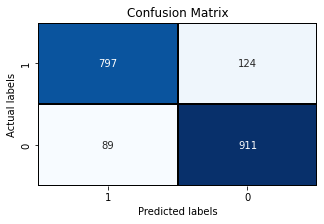

In [19]:
# Confusion matrix
y_pred = pipeline.predict(X_test) # predict method defined in custom CNN class to output binary predictions
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])

# Plot confusion matrix
plt.rcParams['figure.figsize'] = (5, 3)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, linecolor='black', linewidth=0.2, 
           xticklabels=[1, 0], yticklabels=[1, 0])
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.title("Confusion Matrix")

From this confusion matrix, we gather that our CNN model produced the following classification results on the testing set with regards to distinguishing benign and malignant growths/skin tags/tumours:

- 797 true positives (TP - upper left), which means that it predicted 797 growths/skin tags/tumours to be malignant that actually were malignant.
- 124 false negatives (FN - upper right), which means that it predicted 124 growths/skin tags/tumours to be benign that actually were malignant.
- 89 false positives (FP - lower left), which means that it predicted 89 growths/skin tags/tumours to be malignant that actually were benign.
- 911 true negatives (TN - lower right), which means that it predicted 911 growths/skin tags/tumours to be benign that actually were benign.

The first thing we take note of is that the model produced relatively low type 1 and 2 errors (FPs and FNs respectively) in proportion to its TPs and TNs. Another thing we want to take note of is our false negative rate(The positive instances that the classifier misclassified as negative, as a proportion of the total number of positive instances). The false negative rate is important in the case of this study because when dealing with the diagnosis of a disease that can potentially threaten people's lives, you want to know the rate at which your classifier classifies instances as benign when it actually should have classified them as malignant. In this case (on this test set), the CNN model has a false negative rate of approximately 13.46% (124/(124+797)). This is not terrible but because people's lives are potentially at stake, a much lower false negative rate (sub 5%) would be ideal.

We dig further into the CNN model's classification performance by investigating the classification report, which we create using the classification_report() method from Scikit-Learn's metrics module:

In [20]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1000
           1       0.90      0.87      0.88       921

    accuracy                           0.89      1921
   macro avg       0.89      0.89      0.89      1921
weighted avg       0.89      0.89      0.89      1921



It is important to note that the classification_report() method calculates precision, recall and the f1-score for both classes as if they were the positive class then averages those values out (per class) using two average metrics (macro and weighted average). Therefore, Class 0's precision and recall are Class 1's negative predictive value and specificity respectively in this case, since we are treating Class 1 as the positive class. Class 0's f1-score can be treated as a harmonic mean between negative predictive value and specificity for Class 1. We also observe relatively balanced figures between the Class 1 metrics (precision, recall and f1-score) and the Class 0 metrics (negative predictive value, specificity and the 'negative class' f1-score), which tells us that the slight data imbalance had very little to no effect on the classification metrics after all.

As much as the overall predictive performance of the model matters, we are particularly interested in the Class 1 results (precision, recall and f1-score) for this case study. And the overall predictive performance will be measured through the ROC/AUC scores anyways. The following is the breakdown of the precision, recall and f1-score:

- Precision: a precision score of 0.90 tells us that out of all the times the CNN model predicted a growth/skin tag/tumour to be malignant, it made the correct prediction 90% of the time.
- Recall: a recall (true positive rate) score of 0.87 tells us that out of all the positive instances in the testing set (that is, out of all the malignant instances), the CNN model managed to capture 87% of those positive instances.
- F1-score: an f1-score of 0.88 gives us a strong harmonic mean of this model's predictive power regarding the prediction of Class 1 (taking into account the weaknesses of both precision and recall). This model does well at predicting and capturing malignant instances. However, improvement on this performance metric would be ideal considering the severity of the case study.
<br>


### 4.4. Model Evaluation Part 2 - ROC and AUC

Now that we know the CNN model's predictive performance regarding the positive class, we can gauge its overall skilfullness/predictive performance by plotting its ROC. We can create our ROC points we will use to plot our graph using the roc_curve() method imported from Scikit-learn's metrics module. As inputs, the method takes in our target variable from our test set (y_test) and its respective predicted probabilities. We start off by creating the predicted probabilities for our CNN model (using the custom CNN class' defined predict_proba() method), as well as those of a simulated random classifier.

In [21]:
# simulating probabilities that a random classifier would produce and producing probabilities using...
# X_test for CNN model using predict_proba() method
r_probs = [0 for _ in range(len(y_test))] # an absolutely random classifier would very likely get all predictions wrong
cnn_probs = pipeline.predict_proba(X_test) # this predict_proba method outputs the probs for the positive class

57/61 [===========================>..] - ETA: 0s61/61 [==============================] - 0s 3ms/step


Before we plot the ROCs of the CNN model and the simulated random classifier (as a reference), we now have enough information to calculate our AUC scores for the models using the roc_auc_score() method from Scikit-learn's metrics module.

In [22]:
# AUC scores for classifiers (including simulated random = 0.5 [baseline])
r_auc = roc_auc_score(y_test, r_probs)
cnn_auc = roc_auc_score(y_test, cnn_probs)

print("AUC scores for classifiers:\nSimulated Random Classifier: {:.4f}\nGaussian Naive Bayes: {:.4f}".format(
    r_auc, cnn_auc))

AUC scores for classifiers:
Simulated Random Classifier: 0.5000
Gaussian Naive Bayes: 0.9585


The AUC scores will be used for the graph's legend but just from these scores, we can see just how skillful our CNN model is compared to the random classifier. We see the simulated random classifier gets an AUC score of 0.5, of which it should. The CNN model gets an AUC of approximately 0.96, which tells us that the CNN model is very skillful at discriminating between the positive class and the negative class.

Let's now calculate the TPR and FPR values for our models (that we will need to plot the graph) using the roc_curve() method.

In [23]:
# Calculating ROC curve points
# Thresholds for tweaking tpr/fpr rate accordingly
r_fpr, r_tpr, thresholds = roc_curve(y_test, r_probs)
cnn_fpr, cnn_tpr, thresholds = roc_curve(y_test, cnn_probs)

We can now plot our ROC curves to visualize the AUC results using Matplotlib's pyplot module.

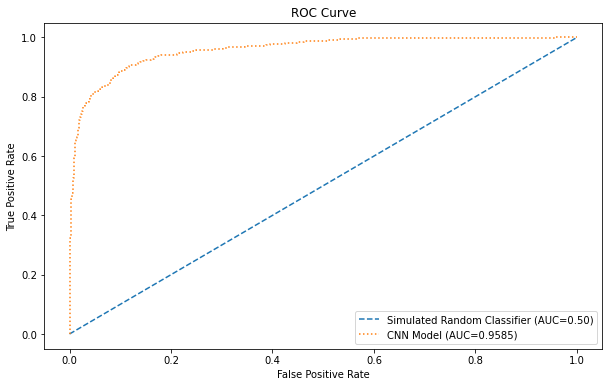

In [24]:
# Plotting ROC curve
plt.rcParams['figure.figsize'] = (10, 6)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Simulated Random Classifier (AUC={:.2f})'.format(r_auc))
plt.plot(cnn_fpr, cnn_tpr, linestyle='dotted', label='CNN Model (AUC={:.4f})'.format(cnn_auc))

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

## 5. Conclusion

The objectives of the analysis that were succesfully completed are as follows:
- Thorough image processing was conducted before using the data for model training purposes.
- A functional CNN model was built, model improvement techniques were applied, and the model was successfully embedded into a fully functioning pipeline along with a user-defined image-scaling class. 
- The pipeline was successfully fit onto the data.
- The necessary model evaluation classification metrics were calculated, interpreted and understood.


Some things to take note of:
- As powerful as the CNN model was, it probably isn't as powerful as it should be considering the fact that it was built to diagnose a potentially life-threatening disease. The classification metrics were very good all-round, but were not ideal in the case of this specific task.
- A greater deal of parametrer flexibility was possible when the custom CNN class was being built; however, the aim was to build something that was task-specific (which was accomplished). Further exploration of this parameter flexibility could possibly lead to better results.

## 6. References

1. SuperAnnotate. 2023. What is image classification? Basics you need to know, 30 May 2023. [Online]. Available at: https://www.superannotate.com/blog/image-classification-basics
2. Medium. 2023. Introduction to Balanced and Imbalanced Datasets in Machine Learning, 9 August 2023. [Online]. Available at: https://medium.com/cord-tech/
3. Levity. 2024. How to Build an Image Classification Dataset, 30 September 2024. [Online]. Available at: https://levity.ai/blog/create-image-classification-dataset 
4. Scikit Learn. 2024. sklearn.base.TransformerMixin. Version 1.5.2. [App]. Available at: https://scikit-learn.org/1.5/modules/generated/sklearn.base.TransformerMixin.html
5. Scikit Learn. 2024. sklearn.base.BaseEstimator. Version 1.5.2. [App]. Available at: https://scikit-learn.org/1.5/modules/generated/sklearn.base.BaseEstimator.html
6. Medium. 2023. How to decide the hyperparameters in CNN, 21 May 2023. [Online]. Available at: https://medium.com/@sengupta.joy4u/how-to-decide-the-hyperparameters-in-cnn-bfa37b608046 
